In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("Restaurant_Reviews.tsv",sep="\t")


In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
print(data.value_counts())

Review                                                                                                                        Liked
I won't be back.                                                                                                              0        2
The food was terrible.                                                                                                        0        2
I would not recommend this place.                                                                                             0        2
I love this place.                                                                                                            1        2
The folks at Otto always make us feel so welcome and special.                                                                 1        1
                                                                                                                                      ..
I will be back many times soon.               

In [ ]:
print(data.Liked.value_counts())

1    500
0    500
Name: Liked, dtype: int64


creating wordcloud
  installing wordcloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def word_cloud(text):

  #create stopword list
  stopword_list=set(STOPWORDS)

  #create wordCloud
  word_cloud=WordCloud(width=550,heaight=550,background_color='white',stopwords=stopword_list,min_font_size=12).generate(text)

  #set worldcloud figure size
  plt.figure(figsize = (8,6))

  #show image
  plt.imshow(word_cloud)

  #removing axis
  plt.axis("off")

  #show plot

  plt.show()

  paragraph = ' '.join(data.Review.tolist())
  word_cloud(paragraph)

mostly used words

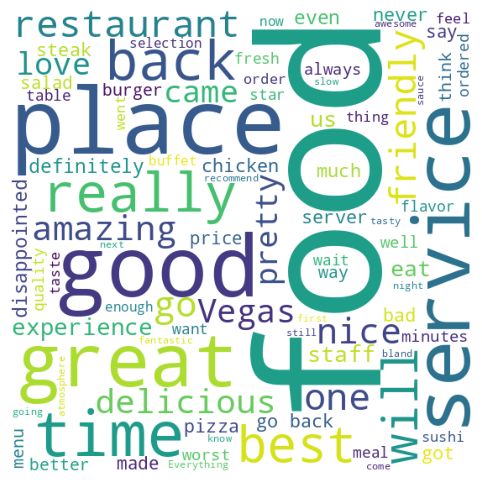

In [ ]:

def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 12).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # show plot
    plt.show()

paragraph=' '.join(data.Review.tolist())
word_cloud(paragraph)


mostly used words where liked value is 1

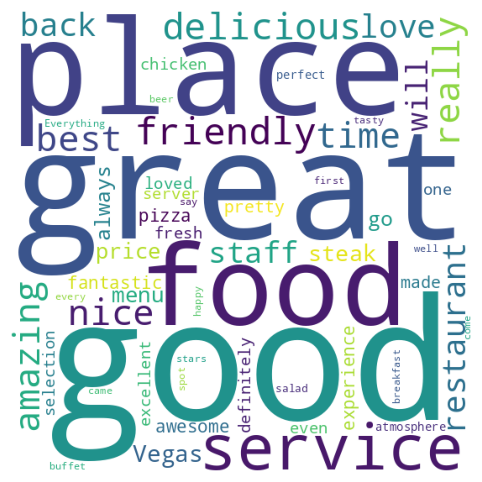

In [ ]:
paragraph=' '.join(data[data.Liked==1].Review.tolist())
word_cloud(paragraph)

mostly used words where liked value is 0

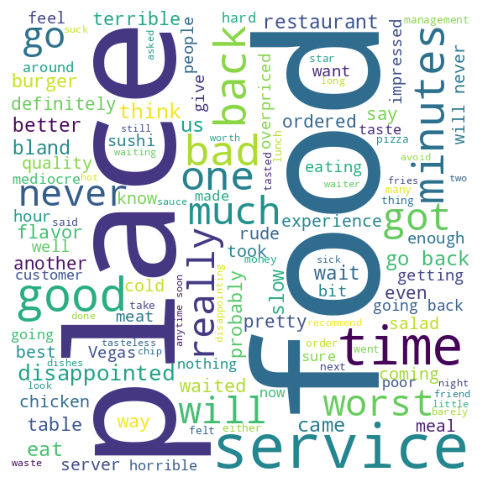

In [ ]:
paragraph=' '.join(data[data.Liked==0].Review.tolist())
word_cloud(paragraph)

Feature Generation using Bag of Words

In [ ]:
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Review'])

print(text_counts.shape)

(1000, 1834)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Split train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts,
                                                    data['Liked'],
                                                    test_size=0.3,
                                                    random_state=1)

Model Building and EvaluationModel Building and Evaluation

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7333333333333333


In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7333333333333333


Predict SentimentPredict Sentiment

In [ ]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

# make prediction
clf.predict(val)

array([0])

# **trying Classification Algorithms:**







# **Multinomial Naive Bayes**

multinomial mb

In [ ]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[106  55]
 [ 29 110]]


Accuracy is  72.0 %
Precision is  0.67
Recall is  0.79


## **Bernoulli Naive Bayes**

In [ ]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[102  59]
 [ 23 116]]


Accuracy is  72.67 %
Precision is  0.66
Recall is  0.83


## **Logistic Regression**

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[124  37]
 [ 34 105]]


Accuracy is  76.33 %
Precision is  0.74
Recall is  0.76


**`hence the highest accurancy we got is 76.33% by using Logistic Regression Method `**